Для решения задачи "Интеллектуальное подавление шума" с помощью машинного обучения, нужно в первую очередь подготовить набор данных, который будет состоять из зашумленной записи и чистой записи. 
Сам в целом процесс можно построить следующим образом: 
  <ol>
  <li> Находим набор данных с чистыми записями</li>
  <li> Назодим набор данных с шумами</li>
  <li> Накладываем зашумленные аудиофайлы на скопированные чистые записи и сохраняем их</li>
  <li> Формируем свой новый набор данных из чистых (метки наших входных данных) и зашумленных записей (входные данные)</li>
  <li> Отбираем некоторое количество записей на тренировку модели и на тестирование модели</li>
  <li> Обучаем модель</li>
  <li>Проверяем качество обучения модели, на тестируемых данных</li>
  <li> Проводим оценку полученного результата - насколько модель смогла очистить данные от шума</li>
  </ol>

При выполнении данной работы, нужно учесть несколько моментов:
<ol>
<li> Лучше не использовать слишком длинные аудио записи или их порезать, так как может возникнуть проблема в сходимости нейронной сети, что отрицательно скажется на результат ее обучения [8]</li>
<li> Нужно сбалансировать входной набор данных по типам шумов , чтобы нейросеть не выучилась только с какими-то определенными типами шумов, а другими нет</li>
<li>При анализе качества работы модели, нужно произвести разметку семплов входного набора данных по типам шумов</li>
<li> Произвести аугментацию исходных данных (ускорение, замедление записей, маскирование какого-то процента банков в спектрограмме, сжатие с потерями и т.п.), чтобы повысить устойчивость модели к изменениям акустических характеристик.</li>
</ol>

Функция для наложения шума одной аудиозаписи на другую 

In [ ]:
def noise_overlay(audio1, audio2):
    import librosa
    import numpy as np
    import IPython.display as ipd
 
    voice_signal, voice_signal_sample_rate = librosa.load(audio1)
    noise_signal, noise_signal_sample_rate = librosa.load(audio2)
    assert voice_signal_sample_rate == noise_signal_sample_rate
    #assert voice_signal.shape[0] == noise_signal.shape[0]
    noised_signal = voice_signal + noise_signal
    ipd.Audio(noised_signal, rate=8000)

In [ ]:
audio2 = '/content/TUT-acoustic-scenes-2017-development/audio/a001_10_20.wav'
audio1 = '/content/buriy_audiobooks_2_val/0/00/47d11d73f818.wav'

noise_overlay(audio1, audio2)

ValueError: ignored

## Сбор данных

Первая часть работы состоит в том, что нужно подготовить набор данных, который будет состоять из чистых записей. Для этого нужно найти русскоязычный набор данных из чистых записей (которые содержат минимальный объем шума). OpenSTT - набор данных, состоящий из:
<table>
<tr>
<td>Тип данных</td>
<td>Аннотация</td>	
<td>Качество</td>
<td>Фразы</td>	
<td>Часы</td>	
<td>GB</td>
</tr>
<tr>
<td>Книги</td><td>alignment</td><td>	95%/ чистый	</td><td>1,1M	</td><td>1,511</td><td>	166</td>
</tr>
<tr>
<td>Звонки</td><td>	ASR</td><td>	70% / шумный</td><td>	837K</td><td>	812</td><td>	89</td>
</tr>
<tr>
<td>Генерированные (русские адреса)</td><td>	TTS</td><td>	100% / 4 голоса</td><td>	1,7M</td><td>	754</td><td>	81</td>
</tr>
<tr>
<td>Речь из видео с YouTube</td><td>	субтитры</td><td>	95% / шумный</td><td>	786K</td><td>	724</td><td>	78</td>
</tr>
<tr>
<td>Книги</td><td>	ASR</td><td>	70% / шумный</td><td>	124K</td><td>	116</td><td>	13</td></tr></tr>
<tr>
<td>Другие датасеты</td><td>	начитывание и alignment</td><td>	99% / чистый</td><td>	17K</td><td>	43</td><td>	5</td>
</tr>
</table>
[7]

!!!Во избежании дальнейших проблем при обучении нейросети, нужно порезать аудиофайлы (пока по секунде).

Проанализировав информацию о данном наборе данных, пришла к выводу, то стоит взять аудиокниги, ? а датасеты с YouTube и звонков оставить на тесты ?. Если исходных "чистых" записей не хватит, то можно будет использовать набор данных типа "Другие датасеты", так как качество записи там очнь высокое.
Сам сайт с наборо данных можно посмотреть по ссылке [2].

### Скачивание с набора данных OpenSTT

In [ ]:
''' Скачиваем исходные файлы с помощью команды "!wget"'''

!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/public_youtube700_val.tar.gz
!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/manifests/public_youtube700_val.csv

!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/buriy_audiobooks_2_val.tar.gz
!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/manifests/buriy_audiobooks_2_val.csv

!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/asr_calls_2_val.tar.gz
!wget -c https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/manifests/asr_calls_2_val.csv

--2020-09-15 13:52:24--  https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/public_youtube700_val.tar.gz
Resolving azureopendatastorage.blob.core.windows.net (azureopendatastorage.blob.core.windows.net)... 52.239.214.164
Connecting to azureopendatastorage.blob.core.windows.net (azureopendatastorage.blob.core.windows.net)|52.239.214.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469326925 (448M) [application/octet-stream]
Saving to: ‘public_youtube700_val.tar.gz’

public_youtube700_v 100%[===================>] 447.58M  23.7MB/s    in 12s     

2020-09-15 13:52:36 (38.6 MB/s) - ‘public_youtube700_val.tar.gz’ saved [469326925/469326925]

--2020-09-15 13:52:36--  https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/manifests/public_youtube700_val.csv
Resolving azureopendatastorage.blob.core.windows.net (azureopendatastorage.blob.core.windows.net)... 52.239.214.164
Connecting to azureopendatastorage.blob

In [ ]:
''' Разархивируем архивы '''
!tar -xvzf /content/buriy_audiobooks_2_val.tar.gz
!tar -xvzf /content/asr_calls_2_val.tar.gz
!tar -xvzf /content/public_youtube700_val.tar.gz

Streaming output truncated to the last 5000 lines.
public_youtube700_val/f/68/974b071dd94a.txt
public_youtube700_val/8/b1/94e8f82cc192.wav
public_youtube700_val/8/b1/94e8f82cc192.txt
public_youtube700_val/c/4b/3833b4d2c1ce.wav
public_youtube700_val/c/4b/3833b4d2c1ce.txt
public_youtube700_val/c/4b/9d26ac1907ce.wav
public_youtube700_val/c/4b/9d26ac1907ce.txt
public_youtube700_val/e/96/680a9ac24373.wav
public_youtube700_val/e/96/680a9ac24373.txt
public_youtube700_val/6/90/4f965275cd0f.wav
public_youtube700_val/6/90/4f965275cd0f.txt
public_youtube700_val/0/37/16698bbf7e01.wav
public_youtube700_val/0/37/16698bbf7e01.txt
public_youtube700_val/6/13/b5ea39c2a88e.wav
public_youtube700_val/6/13/b5ea39c2a88e.txt
public_youtube700_val/1/66/25a7f399046a.wav
public_youtube700_val/1/66/25a7f399046a.txt
public_youtube700_val/e/15/58e291bb6f3f.wav
public_youtube700_val/e/15/58e291bb6f3f.txt
public_youtube700_val/6/d8/7b8063bb2680.wav
public_youtube700_val/6/d8/7b8063bb2680.txt
public_youtube700_val/8/f

Устанавливаем необходимые библиотеки:

In [ ]:
!pip install numpy
!pip install tqdm #Показывает ползунок загрузки
!pip install scipy
!pip install pandas
!pip install soundfile # Позволяет прослушивать звуковой файл в коде (?)
!pip install librosa #для анализа музыки и аудио

### Для дальнейших дейсвий нужно посмотреть, как выглядить manifest:

In [ ]:
import pandas as pd
asr_calls_2 = pd.read_csv('/content/buriy_audiobooks_2_val.csv')
asr_calls_2

buriy_audiobooks_2_val/0/60/3b9e3e73f32e.wav  ...   0.32
0     buriy_audiobooks_2_val/f/ee/4ad576fd66d8.wav  ...   0.34
1     buriy_audiobooks_2_val/a/41/fbd6f4e39de3.wav  ...   0.34
2     buriy_audiobooks_2_val/3/cd/b4244173d871.wav  ...   0.34
3     buriy_audiobooks_2_val/5/ff/d21714aa935f.wav  ...   0.35
4     buriy_audiobooks_2_val/a/d1/0159b4241b39.wav  ...   0.35
...                                            ...  ...    ...
7844  buriy_audiobooks_2_val/1/69/49f490ce2664.wav  ...  16.76
7845  buriy_audiobooks_2_val/2/81/4e1f6f81d814.wav  ...  17.27
7846  buriy_audiobooks_2_val/7/f4/5a8e31d324e3.wav  ...  17.97
7847  buriy_audiobooks_2_val/2/94/2b8c274cd853.wav  ...  18.35
7848  buriy_audiobooks_2_val/3/db/85798b286dcd.wav  ...  21.69

[7849 rows x 3 columns]

Таким образом, он состоит из пути аудиофайла, текстового файла и длительности аудиофайла. Отобразим вместо столбцов сами элементы, которые содержат пути файлы формата .csv

## Формируем набор данных удобрый для нашего вопристия: аудио, текст (что на нем говорят)

Для этого создадим специальные функции для чтения манифестов исходных наборов данных:

In [ ]:
''' Метод, который возвращает строку в виде тега "audio", чтобы в дальнейшем отобразить его с помощью html '''

def audio_player(audio_path):
    return '<audio preload="none" controls="controls"><source src="{}" type="audio/wav"></audio>'.format(audio_path)

''' Метод, который читает текстовой файл и содержимое выводит в виде строки '''

def read_txt_file(text_path):
    response = open(text_path, 'r')
    file = response.readlines()
    return file 

''' Метод, который выводит файл .csv и созраняет его в типе данных pandas.dataset '''

def read_manifest(manifest_path):
    import pandas as pd
    display_df = pd.read_csv(manifest_path,
                        names=['wav_path',
                               'text_path',
                               'duration'])
    return display_df

''' Метод, который выводит содержимое текстовых файлов и отображает аудио '''

def reading_manifest(manifest_df, prepend_path): # manifest_path, string
    import gc
    import numpy as np
    from tqdm import tqdm
    import soundfile as sf
    import pandas as pd
    display_df = manifest_df
    
    display_df['wav'] = [audio_player(prepend_path+path) for path in display_df.wav_path]
    display_df['txt'] = [read_txt_file(prepend_path+path) for path in tqdm(display_df.text_path)]
    audio_style = '<style>audio {height:44px;border:1px;padding:0 20px 0px;margin:-10px -20px -20px;}</style>'
    display_df = display_df[['wav','txt', 'duration']]
    display(HTML(audio_style + display_df.to_html(escape=False)))
    del display_df
    gc.collect()

In [ ]:
def Get_audio(str):
  from IPython.display import Audio
  au = Audio(str)
  return au

###Программная проблема
!!!?Я не понимаю (ниже), как переписать так, чтобы он отображал аудиофайл здесь, как выше. Как поняла, там команда (в методе) работает с файлом из интернета, не с локальным файлом. Когда from IPython.display.Audio делаю в методе, он его не отображает. Думала сформировать датасет и вывести, тоже не отображает. Не понимаю, как решить эту проблему.


In [ ]:
df = read_manifest('/content/buriy_audiobooks_2_val.csv')
#df.append(read_manifest('/content/asr_calls_2_val.csv'))
#df.append(read_manifest('/content/public_youtube700_val.csv'))

In [ ]:
reading_manifest(train, '/content/')


100%|██████████| 7850/7850 [00:00<00:00, 27184.34it/s]


# Отображение аудио в виде графика и построение спектограммы. Аудиоанализ

Аудиоанализ — область, включающая автоматическое распознавание речи (ASR), цифровую обработку сигналов, а также классификацию, тегирование и генерацию музыки — представляет собой развивающийся поддомен приложений глубокого обучения.

Аудио фрагменты представлены в формате .wav. Звуковые волны оцифровываются путем выборки из дискретных интервалов, известных как частота дискретизации.

Частота дискретизации — это количество аудио семплов, передаваемых в секунду, которое измеряется в Гц или кГц.

Каждый семпл представляет собой амплитуду волны в определенном временном интервале, где глубина в битах (или динамический диапазон сигнала) определяет, насколько детализированным будет семпл.

В обработке сигналов семплинг — это преобразование непрерывного сигнала в серию дискретных значений. Частота дискретизации — это количество семплов за определенный фиксированный промежуток времени. Высокая частота дискретизации приводит к меньшей потере информации, но к большим вычислительным затратам.

Звук представлен в форме аудиосигнала с такими параметрами, как частота, полоса пропускания, децибел и т.д. Типичный аудиосигнал можно выразить в качестве функции амплитуды и времени.

Спектрограмма — это визуальный способ представления уровня или «громкости» сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты.


Librosa - модуль Python для анализа звуковых сигналов, предназначенный для работы с музыкой. Он включает все необходимое для создания системы MIR (поиск музыкальной информации).

Отобразить спектрограмму можно с помощью librosa.display.specshow.[1]

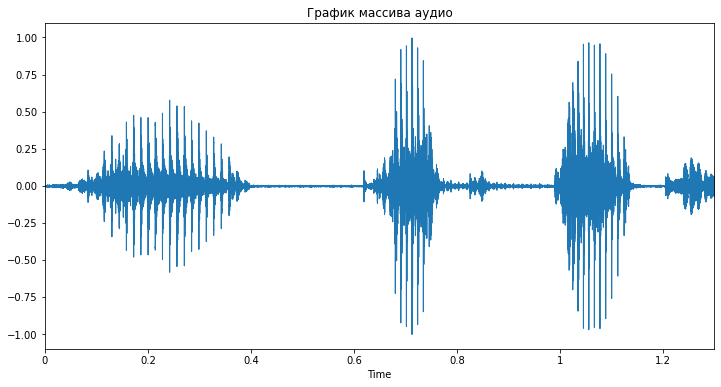

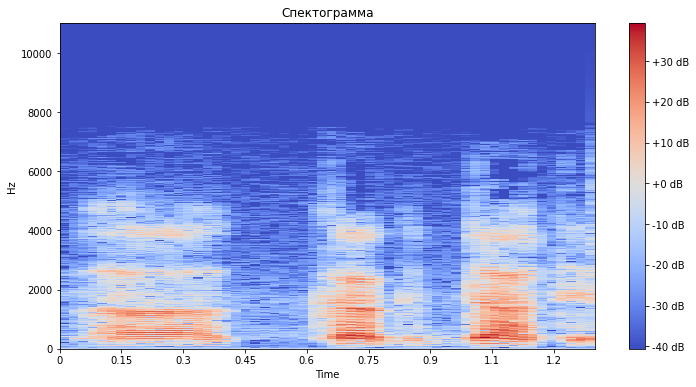

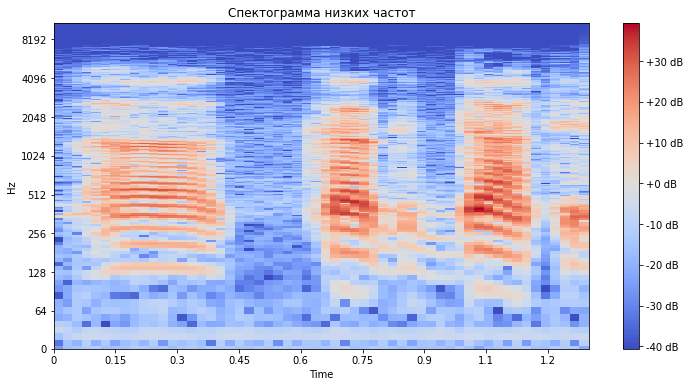

In [ ]:
''' Формируем метод для отображения аудиофайла и построения спектрограммы '''

def Audio_analize(audio_data):
  %matplotlib inline
  import matplotlib.pyplot as plt
  import librosa
  import numpy as np
  #import librosa.display
  #from scipy.io import wavfile #для ввода и вывода звуквого файла
  from librosa import display as ldisplay

  x , sr = librosa.load(audio_data) #n-мерный массив float32 и частота дискретизации
  import IPython.display as ipd
  ipd.Audio(audio_data)
  x.astype('float32')
  absmax = np.max(np.abs(x))
  signal =  x / absmax #нормализация данных
  plt.figure(figsize=(12,6))
  librosa.display.waveplot(signal, sr=sr) #строим график волны по нормализованному массиву и частоте дискретизации
  S = librosa.stft(signal) #Преобразование Фурье
  Sdb = librosa.amplitude_to_db(np.abs(S)) #Получаем массив с размером амплитуды различных частот (семплы), получаем 1-картинку
  plt.title('График массива аудио')

  plt.figure(figsize=(12,6))
  librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='hz') #спектограмма (амплитудная характеристика, частота дискретизации)
  plt.colorbar(format='%+2.0f dB')
  plt.title('Спектограмма')#получаем 2-ую картинку

  #D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
  plt.figure(figsize=(12, 6))
  ldisplay.specshow(Sdb, sr=sr,x_axis='time', y_axis='log')#Логарифмируем, чтобы более детально рассмотреть 
  plt.colorbar(format='%+2.0f dB')
  plt.title('Спектограмма низких частот')#получаем 2-ую картинку

sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Audio_analize(ser)

x , sr = librosa.load(audio_data)

Этот фрагмент возвращает звуковой временной ряд в качестве массива numpy с частотой дискретизации по умолчанию 22 кГц моно. 
  Это поведение можно изменить с помощью повторного семплинга на частоте 44,1 кГц.

librosa.load(audio_data, sr=44100)

.stft() преобразует данные в кратковременное преобразование Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

На второй картинке на вертикальной оси показаны частоты (от 0 до 10 кГц), а на горизонтальной — время. Поскольку все действие происходит в нижней части спектра, мы можем преобразовать ось частот в логарифмическую - картинка 3.[1]





## Преобразование Фурье

Математической основой спектрального анализа сигналов является преобразование Фурье.

Преобразование Фурье позволяет представить непрерывную функцию f(x) (сигнал), определенную на отрезке {0, T} в виде суммы бесконечного числа (бесконечного ряда) тригонометрических функций (синусоид и\или косинусоид) с определёнными амплитудами и фазами, также рассматриваемых на отрезке {0, T}. Такой ряд называется рядом Фурье.

Математически сигнал длительностью T секунд является некоторой функцией f(x), заданной на отрезке {0, T} (X в данном случае — время). Такую функцию всегда можно представить в виде суммы гармонических функций (синусоид или косинусоид) вида:
\begin{equation}
f(x) = \frac{A_0}{2} + \sum \limits_{k=1}^{\infty} A_k \cos \left( \frac{2 k \pi x}{\tau} + \theta_k \right)
\end{equation}

\begin{equation}
k - номер\ тригонометрической\ функции(номер\ гармонической составляющей,\ номер гармоники);\\
\tau - отрезок, где\ функция определена\ (длительность сигнала);\\
A_k - амплитуда \ k-ой\ гармонической\ составляющей;\\
\theta_k - начальная фаза k-ой гармонической составляющей;
\end{equation}
[3]


<i>Что значит «представить функцию в виде суммы ряда»? Это значит, что, сложив в каждой точке значения гармонических составляющих ряда Фурье, получаем значение нашей функции в этой точке.
Если рассмотреть ряд Фурье (сумму синусоид) на всей оси Х, то можно увидеть, что вне отрезка {0, T} функция представленная рядом Фурье будет будет периодически повторять нашу функцию.
Исходная функция сигнала — непрерывная, непериодическая, определена на некотором отрезке длиной T.
Спектр этой функции — дискретный, то есть представлен в виде бесконечного ряда гармонических составляющих — ряда Фурье.
По факту, рядом Фурье определяется некоторая периодическая функция, совпадающая с нашей на отрезке {0, T}, но для нас эта периодичность не существенна.

Периоды гармонических составляющих кратны величине отрезка {0, T}, на котором определена исходная функция f(x). Другими словами, периоды гармоник кратны длительности измерения сигнала. Например, период первой гармоники ряда Фурье равен интервалу Т, на котором определена функция f(x). Период второй гармоники ряда Фурье равен интервалу Т/2.

Пусть наша исходная функция, представляет собой сигнал, записанный в течение Т=1 сек. Тогда период первой гармоники будет равен длительности нашего сигнала Т1=Т=1 сек и частота гармоники равна 1 Гц. Период второй гармоники будет равен длительности сигнала, деленной на 2 (Т2=Т/2=0,5 сек) и частота равна 2 Гц. Для третьей гармоники Т3=Т/3 сек и частота равна 3 Гц. И так далее.

Шаг между гармониками в этом случае равен 1 Гц.

Таким образом сигнал длительностью 1 сек можно разложить на гармонические составляющие (получить спектр) с разрешением по частоте 1 Гц.
Чтобы увеличить разрешение в 2 раза до 0,5 Гц — надо увеличить длительность измерения в 2 раза — до 2 сек. Сигнал длительностью 10 сек можно разложить на гармонические составляющие (получить спектр) с разрешением по частоте 0,1 Гц.
</i>
[3]


## Извлечение признаков из аудио сигнала (На всякий случай)

Надо? Может пригодиться в шуме

<i>
Каждый аудиосигнал состоит из множества признаков. Мы будем извлекать только те характеристики, которые относятся к решаемой нами проблеме. Этот процесс называется извлечением признаков. Рассмотрим некоторые из них подробнее.

Спектральные (частотные) признаки получаются путем преобразования временного сигнала в частотную область с помощью преобразования Фурье. К ним относятся частота основного тона, частотные компоненты, спектральный центроид, спектральный поток, спектральная плотность, спектральный спад и т.д.
<p>
<b>Спектральный центроид</b></p><p>
Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен «центр масс» для звука. Схож со средневзвешенным значением:
</p>
\begin{equation}
f(x) = \frac{\sum \limits_{k=1}^{\infty} S(k) f(k)}{\sum \limits_{k=1}^{\infty} S(k)} 
\end{equation}

где S(k) — спектральная величина элемента разрешения k, а f(k) — частота элемента k.

</i>

In [ ]:
'''возвращает массив со столбцами, равными количеству фреймов, представленных в семпле.'''

def Spectral_centroid(audio_data):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa

    x , sr = librosa.load(audio_data) #n-мерный массив float32 и частота дискретизации
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    #spectral_centroids.shape

    # Вычисление временной переменной для визуализации
    plt.figure(figsize=(12, 4))

    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='b')
  # Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    import sklearn
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
  # Построение спектрального центроида вместе с формой волны


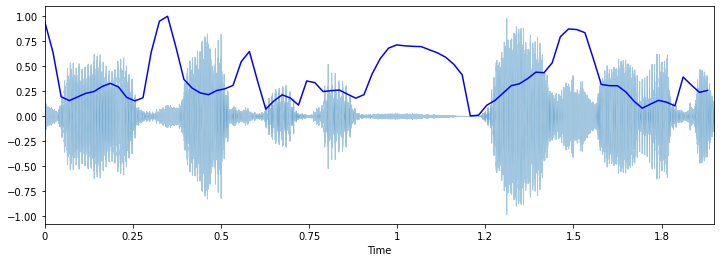

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Spectral_centroid(ser)

<b>Спектральный спад</b>
<p>Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах.

librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:</p>

In [ ]:
def Spectral_fall(audio_data):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa

    x , sr = librosa.load(audio_data) #n-мерный массив float32 и частота дискретизации
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
    plt.figure(figsize=(12, 4))

    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')

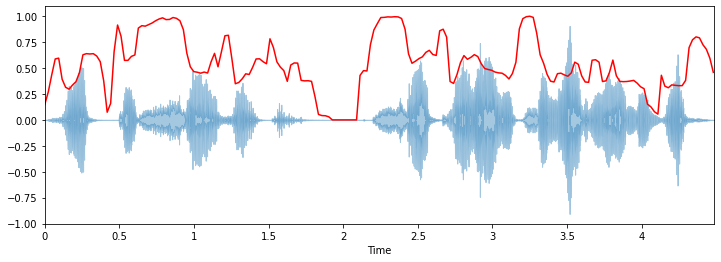

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Spectral_fall(ser)

<b>Спектральная ширина</b>
<p>Спектральная ширина определяется как ширина полосы света на половине максимальной точки (или полная ширина на половине максимума [FWHM]) и представлена двумя вертикальными красными линиями и λSB на оси длин волн.
</p>
<img src="https://miro.medium.com/max/515/1*oUtYY0-j6iEc78Dew3d0uA.png">
<p>Гауссово распределение интенсивности длин волн, выходящих из монохроматора. Спектральная полоса пропускания определяется красными границами и λSB. Ширина спектральной щели обозначена синими границами и λSSW.</p>
librosa.feature.spectral_bandwidth вычисляет спектральную ширину порядка p:

In [ ]:
def Spectral_bandwidth(audio_data):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa

    x , sr = librosa.load(audio_data) #n-мерный массив float32 и частота дискретизации
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
    plt.figure(figsize=(15, 9))

    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_bandwidth_2), color='r')
    plt.plot(t, normalize(spectral_bandwidth_3), color='g')
    plt.plot(t, normalize(spectral_bandwidth_4), color='y')
    plt.legend(('p = 2', 'p = 3', 'p = 4'))

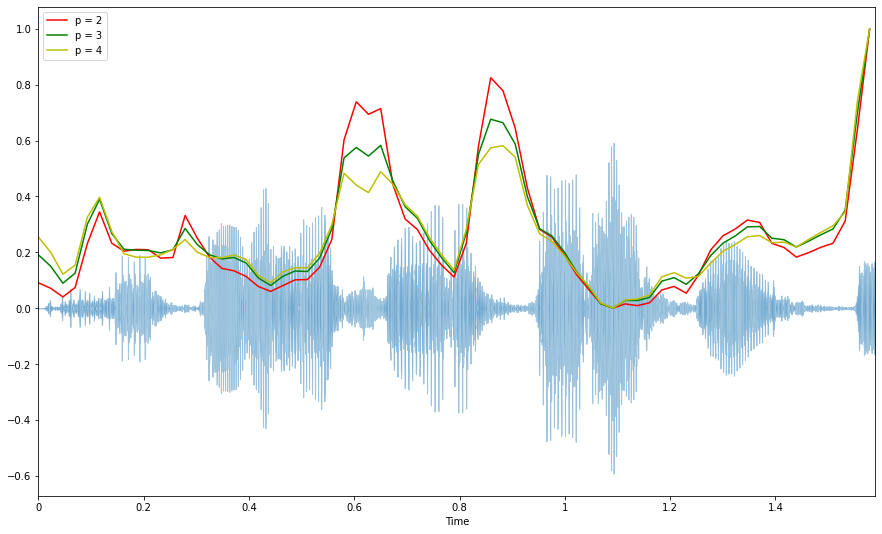

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Spectral_bandwidth(ser)

<b>Скорость пересечения нуля</b>

Простой способ измерения гладкости сигнала — вычисление числа пересечений нуля в пределах сегмента этого сигнала. Голосовой сигнал колеблется медленно. Например, сигнал 100 Гц будет пересекать ноль 100 раз в секунду, тогда как «немой» фрикативный сигнал может иметь 3000 пересечений нуля в секунду.

\begin{equation}
scr = \frac{1}{T-1}{\sum \limits_{t=1}^{T-1} II(X) s_t s_{t-1}<0}
\end{equation}
\begin{equation}
s_t - сигнал размерностью длины записи (t)
\end{equation}
\begin{equation}
II(X) - функция-индикатор (если Х true, равна 1, иначе 0)
\end{equation}



In [ ]:
def Zero_crossing_rate(audio_data, n0, n1):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa
    x, sr = librosa.load(audio_data)
    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    print(sum(zero_crossings))#16
    # Построение графика сигнала:
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)
    plt.figure(figsize=(14, 5))
    #Увеличение масштаба:
    plt.plot(x[n0:n1])
    plt.grid()

2


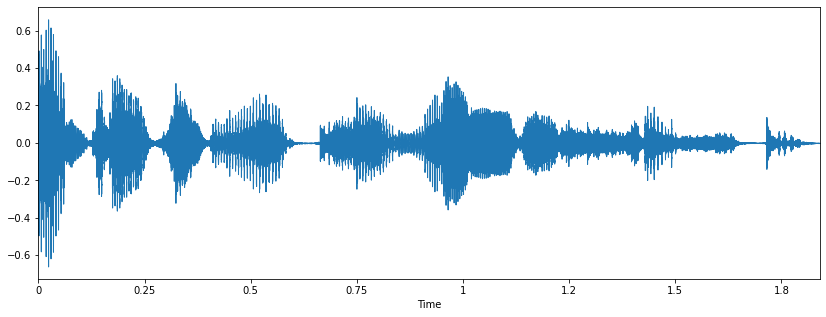

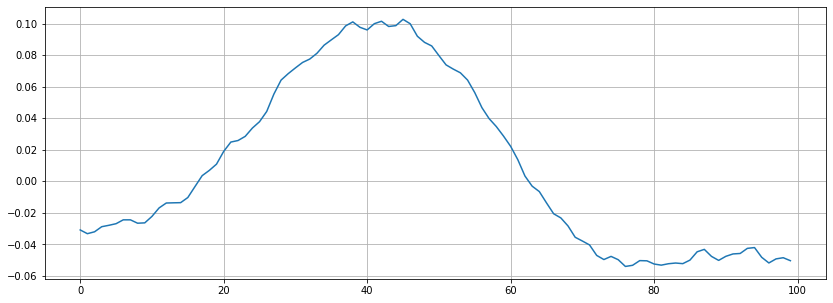

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Zero_crossing_rate(ser, 9000, 9100)

<b>Мел-частотные кепстральные коэффициенты (MFCC)</b>
<p>
Представляют собой небольшой набор признаков (обычно около 10–20), которые кратко описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса.</p>


In [ ]:
def MFCC(audio_data, fs):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa
    x, sr = librosa.load(audio_data)
    mfccs = librosa.feature.mfcc(x, sr=fs)
    print("mfccs.shape: {}".format(mfccs.shape))
    #(20, 97)
    # Отображение MFCC:
    plt.figure(figsize=(15, 7))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

mfccs.shape: (20, 47)


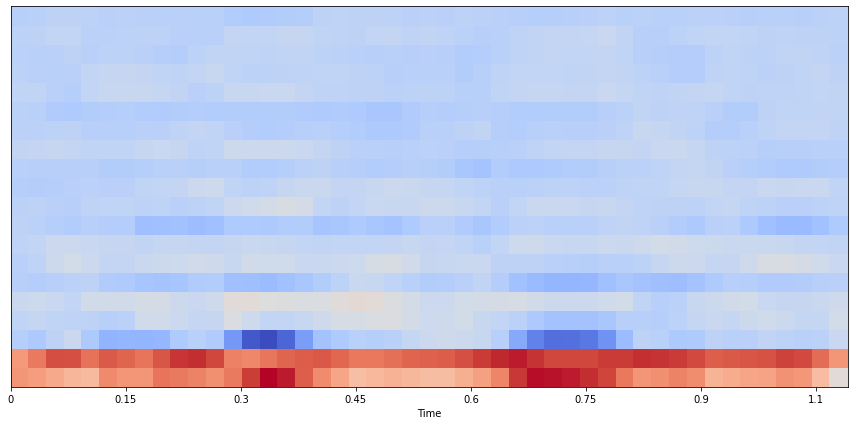

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
MFCC(ser,2)

<b>Цветность</b>
<p>Признак или вектор цветности обычно представлен вектором признаков из 12 элементов, в котором указано количество энергии каждого высотного класса {C, C#, D, D#, E, …, B} в сигнале. Используется для описания меры сходства между музыкальными произведениями.

librosa.feature.chroma_stft используется для вычисления признаков цветности.</p>

In [ ]:
def Colors(audio_data, hop_length):
    %matplotlib inline
    import matplotlib.pyplot as plt
    import librosa
    x, sr = librosa.load(audio_data)
    chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

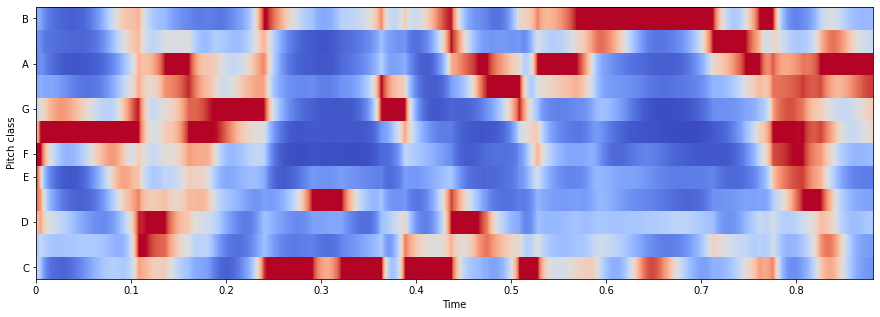

In [ ]:
sample = df.sample(n=5)
ser = sample.iloc[0].wav_path
Colors(ser,12)

## !!!Нарезка аудиофайлов

# Подготовка шумов

## Поиск наборов данных с шумами

In [ ]:
!wget -c https://zenodo.org/record/400515/files/TUT-acoustic-scenes-2017-development.audio.1.zip #подходит, но надо классифицировать (разобраться с документацией)
#!wget -c https://zenodo.org/record/1040168/files/TUT-acoustic-scenes-2017-evaluation.audio.1.zip  # тоже самое
#!wget -c http://web.cse.ohio-state.edu/pnl/corpus/HuNonspeech/Nonspeech.zip #неклассифицированые записи, но их в целом не так много, можно помучиться
#!wget -c http://www.openslr.org/resources/13/RWCP.tar.gz #сложно найти аудиофайлы

--2020-09-15 13:54:49--  https://zenodo.org/record/400515/files/TUT-acoustic-scenes-2017-development.audio.1.zip
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1071445248 (1022M) [application/octet-stream]
Saving to: ‘TUT-acoustic-scenes-2017-development.audio.1.zip’

TUT-acoustic-scenes 100%[===================>]   1022M  23.5MB/s    in 86s     

2020-09-15 13:56:16 (11.9 MB/s) - ‘TUT-acoustic-scenes-2017-development.audio.1.zip’ saved [1071445248/1071445248]



In [ ]:
''' Если архив zip, то ставим 1, если нет (tar.gz) 0 '''

def unarhiv(str, zip):
  if(zip == 1):
    import zipfile
    z = zipfile.ZipFile(str, 'r')
    z.extractall() 
  else:
    !tar -xvzf str

unarhiv('/content/TUT-acoustic-scenes-2017-development.audio.1.zip', 1)

В целом, было найдено несколько наборов данных с шумами:
<ol>
<li>
Nonspeech [4]</li>
<li>RWCP [5]</li>
<li>Набор данных акустических сцен</li>
<li>Audioset</li>
</ol>

Каждый набор данных имеет свои сложности при работе с ним, потому скорее всего отребуется писать дополнительные функции для отображения и чтения файлов в них. К тому же, во втором наборе из списка не классифицированы звуки, из-за чего могут возникнуть сложности в дальнейшем при анализе оценки качества работы нейросети. Последний набор имеет необычный формат данных, и кажется, требуется поиск дополнительной инормации для работы с ним. Предпоследний набор данных явных проблем и опасений не вызывает. К каждому набору, которые вылодены на сайте приложен описательный документ в формате .pdf, который позволяет быстро и качественно классифицировать аудиофайлы.

In [ ]:
Get_audio('/content/TUT-acoustic-scenes-2017-development/audio/a007_110_120.wav')

# Список используемых источников:

[1] https://nuancesprog-ru.turbopages.org/nuancesprog.ru/s/p/6713/

[2] https://azure.microsoft.com/en-us/services/open-datasets/catalog/open-speech-to-text/#AzureNotebooks

[3] https://habr.com/ru/post/269991/

[4] http://web.cse.ohio-state.edu/pnl/corpus/HuNonspeech/HuCorpus.html

[5] https://www.openslr.org/13/

[6] http://www.cs.tut.fi/sgn/arg/dcase2017/challenge/download

[7] https://habr.com/ru/post/450760/

[8] https://ru.stackoverflow.com/questions/846667/Нейросеть-не-сходится

# Подготовка набора данных шумов с классификацией



# Наложение шума на чистую запись. Полный сбор набора данных.

# Аугментация данных